In [1]:
using PythonPlot
using Colors
using Images
using DifferentialEquations
using Statistics
using JLD2
using StatsBase

In [ ]:
# Number of spots
# Intensities of spots
seed = 2
volume = 900
sol = load("../../fig5-simulations/sims/simple_30min_seed_$(seed)_volume_$(volume).jld2", "sol_simp")
maxima = findlocalmaxima(sol[:,:,1,end], edges=false)

vals_maxima = sol[:,:,1,end][maxima]
n_maxima = length(vals_maxima[vals_maxima .> 10]) # Excludes spots less than intensity 10
radius = cbrt(volume/(4/3 * pi))
println("n spots = $(n_maxima)")
println("volume of $(volume) => radius of $(radius)")

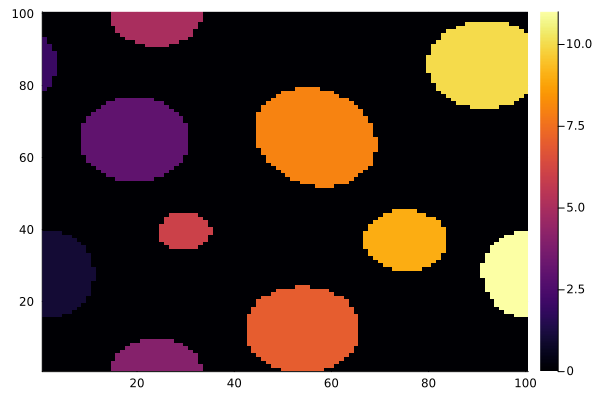

In [8]:
mask = sol[:,:,1,end] .> minimum(vals_maxima)*.5
bin_lab = label_components(mask)
heatmap(bin_lab)

In [9]:
img = sol[:,:,1,end]
maxes = zeros(length(unique(bin_lab)))
i=1
for patch in unique(bin_lab)
    patch_mask = img[bin_lab .== patch]
    maxes[i] = maximum(patch_mask)
    i+=1
end


In [10]:
maxes

12-element Vector{Float64}:
 165.7627709534819
 333.52356242961196
 294.2534984825713
 334.3987330136863
 337.9084161991213
 337.9887881316647
 341.34780081537997
 333.8062647012988
 331.9468230845544
 339.57910203046885
 333.6583662450796
 333.22405228800557

In [11]:
variation(maxes)

0.15567562507936758

In [34]:
# For all random seeds
# Record intensity of patches


seeds = (1,2,3,4,5,6,7,8,9,10,11,12)
volumes = (50,100,200,300,400,500,600,700,800,900)

avg_cov = []

for volume in volumes
    covs = []
    for seed in seeds
        sol = load("../../Simulations/sims/simple_30min_seed_$(seed)_volume_$(volume).jld2", "sol_simp");
        locs = findlocalmaxima(sol[:,:,1,end], edges=false)
        maxima = sol[:,:,1,end][locs]
        maxima = maxima[maxima .> 10]
        cov = variation(maxima)
        if !isnan(cov)
            append!(covs, cov)
        end
    end
    if length(covs) > 0
        append!(avg_cov, mean(covs))
    else
        append!(avg_cov, 0)
    end
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

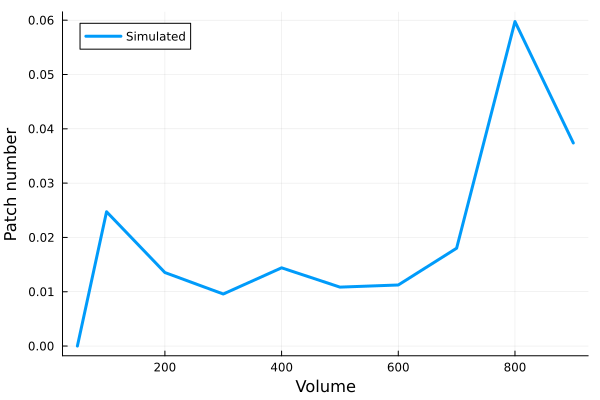

In [35]:
volumes = [50,100,200,300,400,500,600,700,800,900]
plot(volumes, avg_cov, linewidth=3, label="Simulated", xaxis="Volume", yaxis="Patch number", color=1)
#savefig("N_by_V_tmp.png")

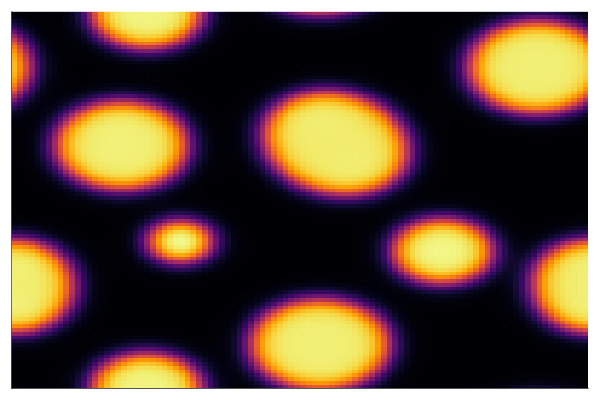

In [221]:
heatmap(sol[:,:,1,end], clim=(0,350), xticks=false, yticks=false, colorbar=false)
#savefig("seed2_vol900.png")

In [40]:
# For all random seeds
# For each radius
# Record number of patches
# Record intensity of patches
# Record stdev for patch intensity

seeds = (1,2,3,4,5,6,7,8,9,10,11,12)
volumes = (50,100,200,300,400,500,600,700,800,900)

avg_m = []
std_m = []
avg_n = []
std_n = []
max_n = []
min_n = []
avg_i = []
max_i = []
min_i = []

for volume in volumes
    n = []
    m = []
    i = []
    for seed in seeds
        sol = load("../../fig5-simulations/sims/simple_30min_seed_$(seed)_volume_$(volume).jld2", "sol_simp");
        locs = findlocalmaxima(sol[:,:,1,end], edges=false)
        maxima = sol[:,:,1,end][locs]
        maxima = maxima[maxima .> 10]
        append!(m, maxima)
        append!(i, mean(maxima))
        append!(n, length(maxima))
    end
    append!(avg_n, mean(n))
    append!(min_n, minimum(n))
    append!(max_n, maximum(n))
    append!(avg_m, mean(m))
    append!(avg_i, mean(i))
    append!(min_i, minimum(i))
    append!(max_i, maximum(i))
    append!(std_n, std(n)*(!isnan(std(n)))) # workaround to transform NaN to 0
    append!(std_m, std(m)*(!isnan(std(m))))
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

In [17]:
using DataFrames
using CSV
experimental = CSV.read("../data/siteNumber.csv", DataFrame)
exp_rad = experimental[!, "EffectiveRadius"]
exp_n = experimental[!, "Bud Number"]
exp_v = experimental[!, "NA"].* ((4/3)*(0.5^3)*pi);

In [5]:
#function mask_sites(img):
threshold = 0.55
bin = avgimg .> maximum(avgimg)*threshold
bin_lab = label_components(bin)


UndefVarError: UndefVarError: `avgimg` not defined

In [6]:
volumes = [50,100,200,300,400,500,600,700,800,900]
plot(volumes, avg_n, linewidth=3, ribbon=std_n, fillalpha=.5, label="Simulated", xaxis="Volume", yaxis="Patch number", color=1)
plot!(volumes, avg_n, ribbon=(max_n-avg_n, avg_n-min_n), fillalpha=.2, label=false, xaxis="Volume", yaxis="Patch number", color=1)
scatter!(exp_v, exp_n, color="red", label="Measured Cells", alpha=0.7)
#savefig("N_by_V_tmp.png")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [52]:
max_n

10-element Vector{Any}:
  1
  3
  5
  5
  7
  7
  8
  9
 11
 12

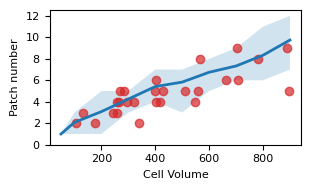

In [87]:
volumes = [50,100,200,300,400,500,600,700,800,900]


mpl = PythonPlot.pyimport("matplotlib")
mpl.rcParams["svg.fonttype"] = "none"

fig, ax = subplots(figsize=(3.25,1.75))
ax.plot(volumes, avg_n, linewidth=2, color="C00")
ax.fill_between(volumes, min_n.+0.0, max_n.+0.0, alpha=0.2)
ax.scatter(exp_v, exp_n, color="C03", label="Measured Cells", alpha=0.7, marker="o")
ax.set_ylabel("Patch number", fontsize=8)
ax.set_xlabel("Cell Volume", fontsize=8)
ax.set_yticks(0:2:12)
savefig("tmp.svg")
display(gcf())

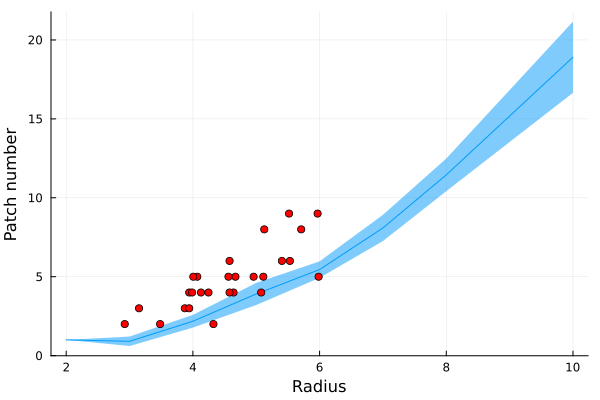

In [405]:
plot(radii, avg_n, ribbon=std_n, fillalpha=.5, label=false, xaxis="Radius", yaxis="Patch number")
scatter!(exp_rad, exp_n, color="red", label=false)
#savefig("maxn_by_r_tmp.png")

┌ Info: Saved animation to /tmp/jl_5YxGpMz0xA.gif
└ @ Plots /home/dinosaur/.julia/packages/Plots/HyyIK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_5YxGpMz0xA.gif")
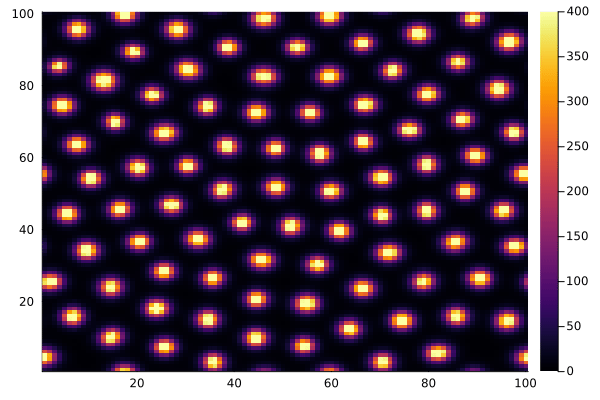

In [20]:
anim = @animate for i in 1:100
    Plots.heatmap(sol[:,:,1,i],clim=(0,400))
end
gif(anim, fps=60)

In [13]:
# For all random seeds
# For each radius
# Record number of patches
# Record intensity of patches
# Record stdev for patch intensity

seeds = (1)
radii = [2,3,4,5,6,7,8,10]

avg_m = []
std_m = []
avg_n = []
std_n = []

for radius in radii
    n = []
    m = []
    SA = 4*pi*radius^2
    for seed in seeds
        sol = load("../../Simulations/sims/negFB_10min_seed_$(seed)_radius_$(radius).jld2", "sol_neg");
        avg_sol = mean(sol[:,:,1,1:end], dims=(3,4))[:,:,1]
        locs = findlocalmaxima(avg_sol, edges=false)
        maxima = avg_sol[locs]
        maxima = maxima[maxima .> maximum(maxima)*0.1]
        append!(m, maxima)
        append!(n, length(maxima))
    end
    append!(avg_n, mean(n))
    append!(avg_m, mean(m))
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#negfb!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#negfb!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#negfb!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#negfb!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#negfb!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base

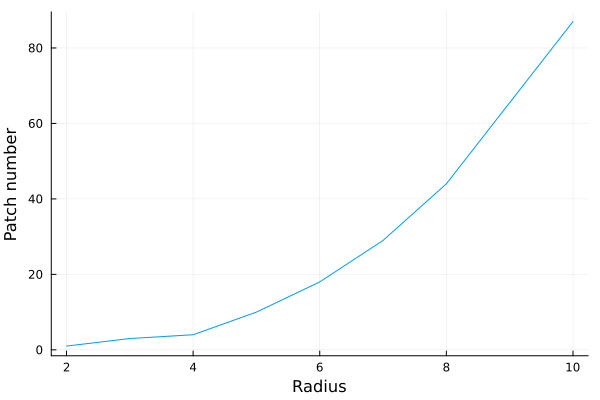

In [14]:
plot(radii, avg_n, label=false, xaxis="Radius", yaxis="Patch number")

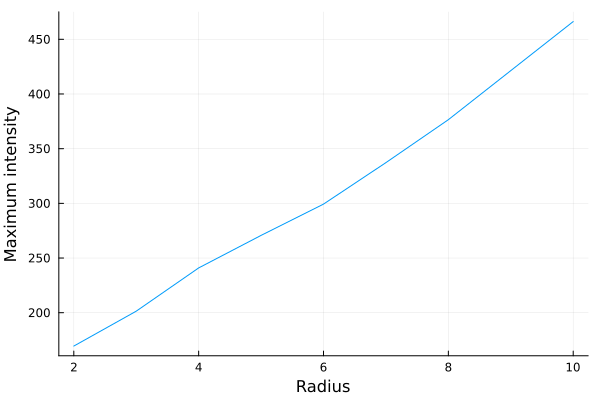

In [15]:
plot(radii, avg_m, label=false, xaxis="Radius", yaxis="Maximum intensity")
#savefig("maxint_by_r_tmp.png")